In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [21]:
# Intervalo de datas para a geração aleatória de jogos com o objetivo de testar o site web desenvolvido
start_date = datetime(2024, 11, 10)
end_date = datetime(2025, 4, 30)

# Função para gerar uma data aleatória dentro do intervalo
def random_date(start, end):
    delta = end - start
    random_days = np.random.randint(0, delta.days + 1)
    return start + timedelta(days=random_days)

In [22]:
# Carregar os dados recolhidos de outubro
df = pd.read_csv("novembro_dailyleaders_2024.csv")

In [23]:
df.head()

,Player,Tm,PTS,TRB,AST,Date
0,Anthony Davis,LAL,38,11,2,2024-11-01
1,Nikola Vučević,CHI,28,11,3,2024-11-01
2,Zion Williamson,NOP,34,6,10,2024-11-01
3,Nikola Jokić,DEN,26,9,13,2024-11-01
4,Aaron Gordon,DEN,31,11,2,2024-11-01


In [24]:
# Substituir a coluna 'Date' por datas simuladas para efeitos de teste
df['Date'] = [random_date(start_date, end_date) for _ in range(len(df))]

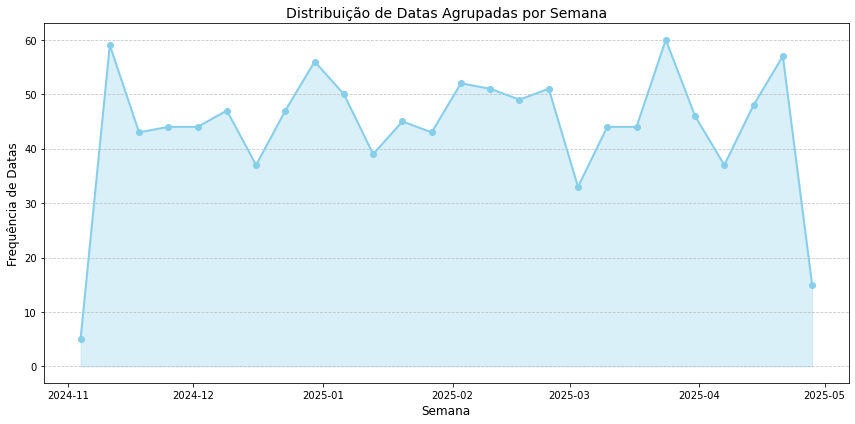

In [25]:
# Converter coluna 'Date' para datetime caso ainda não esteja
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar datas por semana
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Contagem de ocorrências por semana
weekly_counts = df['Week'].value_counts().sort_index()

# Plotar um gráfico de linhas para uma visão mais clara
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', color='skyblue', linewidth=2)
plt.fill_between(weekly_counts.index, weekly_counts.values, color='skyblue', alpha=0.3)

# Configurações do gráfico
plt.title("Distribuição de Datas Agrupadas por Semana", fontsize=14)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Frequência de Datas", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
df.to_csv('dailyleaders.csv', index=False)